In [54]:
from tpot import TPOTClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/Users/cestdrama/Desktop/emotion-demo.csv')
data.head()

,song,sadness,joy,analytical,target
0,喜欢你,0.688923,0.664950,0.000000,1
1,越难越爱,0.564981,0.694766,0.000000,0
2,多远都要在一起,0.565116,0.665297,0.536494,1
3,红日,0.606664,0.528863,0.880644,1
4,光辉岁月,0.599139,0.501519,0.000000,1


In [55]:
data['target'].value_counts()

0    11
1     9
Name: target, dtype: int64

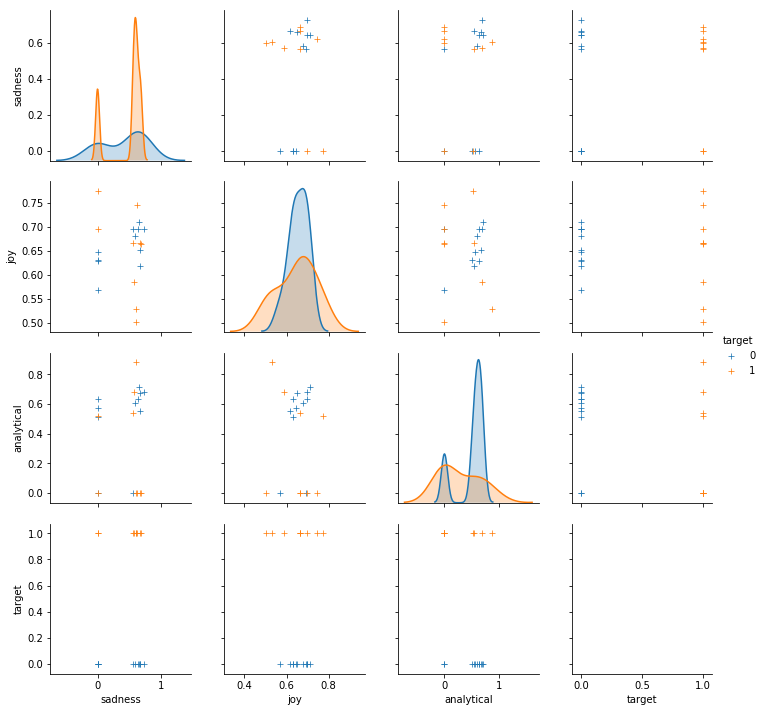

In [60]:
tmp = data.drop('song', axis=1)
g = sns.pairplot(tmp, hue='target', markers='+')
plt.show()

In [61]:
X=data.drop(['target', 'song'], axis=1)
print(X)

     sadness       joy  analytical
0   0.688923  0.664950    0.000000
1   0.564981  0.694766    0.000000
2   0.565116  0.665297    0.536494
3   0.606664  0.528863    0.880644
4   0.599139  0.501519    0.000000
5   0.667948  0.666117    0.000000
6   0.625493  0.744573    0.000000
7   0.000000  0.695544    0.000000
8   0.000000  0.774177    0.518298
9   0.572018  0.585796    0.683846
10  0.000000  0.630808    0.511728
11  0.583840  0.680206    0.609032
12  0.727683  0.695966    0.683663
13  0.661171  0.651805    0.675031
14  0.000000  0.628542    0.630370
15  0.644295  0.696204    0.630370
16  0.000000  0.647149    0.569618
17  0.666306  0.618635    0.550773
18  0.646752  0.709950    0.714973
19  0.000000  0.568379    0.000000


In [58]:
y=data['target']
print(y)

0     1
1     0
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: target, dtype: int64


[0.13990091 0.17020458 0.14416387 0.16630812 0.15118074 0.13328378]


<Figure size 432x288 with 0 Axes>

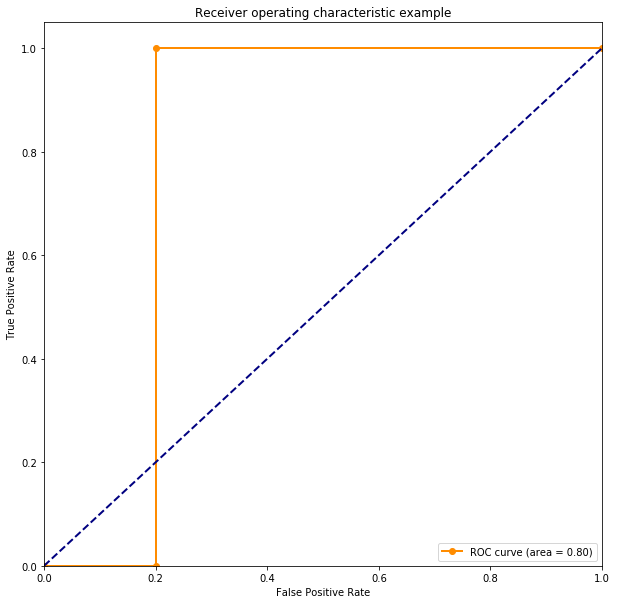

In [67]:
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc  ###计算roc和auc
# from sklearn import cross_validation
from sklearn import model_selection
 
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]
 
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.3,random_state=0)
 
# Learn to predict each class against the other
svm = svm.SVC(kernel='linear', probability=True,random_state=random_state)
 
###通过decision_function()计算得到的y_score的值，用在roc_curve()函数中
y_score = svm.fit(X_train, y_train).decision_function(X_test)
print(y_score)
 
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(y_test, y_score) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值
 
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc,marker = 'o') ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()